In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
from tqdm import tqdm
import pandas as pd
from pathlib import Path


In [23]:
base_dir = "processed_images"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

# Get file counts for both train and test sets
train_cataract = os.listdir(os.path.join(train_dir, "cataract"))
train_normal = os.listdir(os.path.join(train_dir, "normal"))
test_cataract = os.listdir(os.path.join(test_dir, "cataract"))
test_normal = os.listdir(os.path.join(test_dir, "normal"))

# Print dataset statistics
print("Dataset Overview:")
print("\nTraining Set:")
print(f"Cataract images: {len(train_cataract)}")
print(f"Normal images: {len(train_normal)}")
print(f"Total training images: {len(train_cataract) + len(train_normal)}")

print("\nTest Set:")
print(f"Cataract images: {len(test_cataract)}")
print(f"Normal images: {len(test_normal)}")
print(f"Total test images: {len(test_cataract) + len(test_normal)}")


Dataset Overview:

Training Set:
Cataract images: 245
Normal images: 246
Total training images: 491

Test Set:
Cataract images: 61
Normal images: 60
Total test images: 121


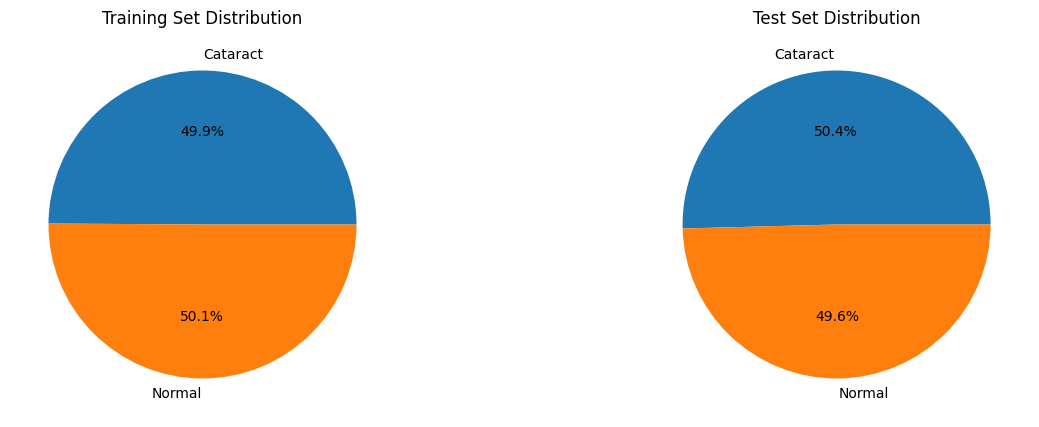

In [24]:
plt.figure(figsize=(15, 5))

# Training set distribution
plt.subplot(1, 2, 1)
plt.pie([len(train_cataract), len(train_normal)], 
        labels=['Cataract', 'Normal'],
        autopct='%1.1f%%')
plt.title('Training Set Distribution')

# Test set distribution
plt.subplot(1, 2, 2)
plt.pie([len(test_cataract), len(test_normal)], 
        labels=['Cataract', 'Normal'],
        autopct='%1.1f%%')
plt.title('Test Set Distribution')

plt.show()

In [25]:
def get_image_properties(img_path):
    img = cv2.imread(img_path)
    if img is not None:
        return {
            'height': img.shape[0],
            'width': img.shape[1],
            'aspect_ratio': img.shape[1] / img.shape[0],
            'brightness': np.mean(img),
            'size_kb': os.path.getsize(img_path) / 1024
        }
    return None

In [26]:
image_properties = []

# Process training images
for category in ['cataract', 'normal']:
    img_dir = os.path.join(train_dir, category)
    for img_file in tqdm(os.listdir(img_dir), desc=f"Processing training {category}"):
        img_path = os.path.join(img_dir, img_file)
        props = get_image_properties(img_path)
        if props:
            props['class'] = category
            props['split'] = 'train'
            props['filename'] = img_file
            image_properties.append(props)

# Process test images
for category in ['cataract', 'normal']:
    img_dir = os.path.join(test_dir, category)
    for img_file in tqdm(os.listdir(img_dir), desc=f"Processing test {category}"):
        img_path = os.path.join(img_dir, img_file)
        props = get_image_properties(img_path)
        if props:
            props['class'] = category
            props['split'] = 'test'
            props['filename'] = img_file
            image_properties.append(props)

Processing test normal: 100%|██████████| 60/60 [00:00<00:00, 89.95it/s]


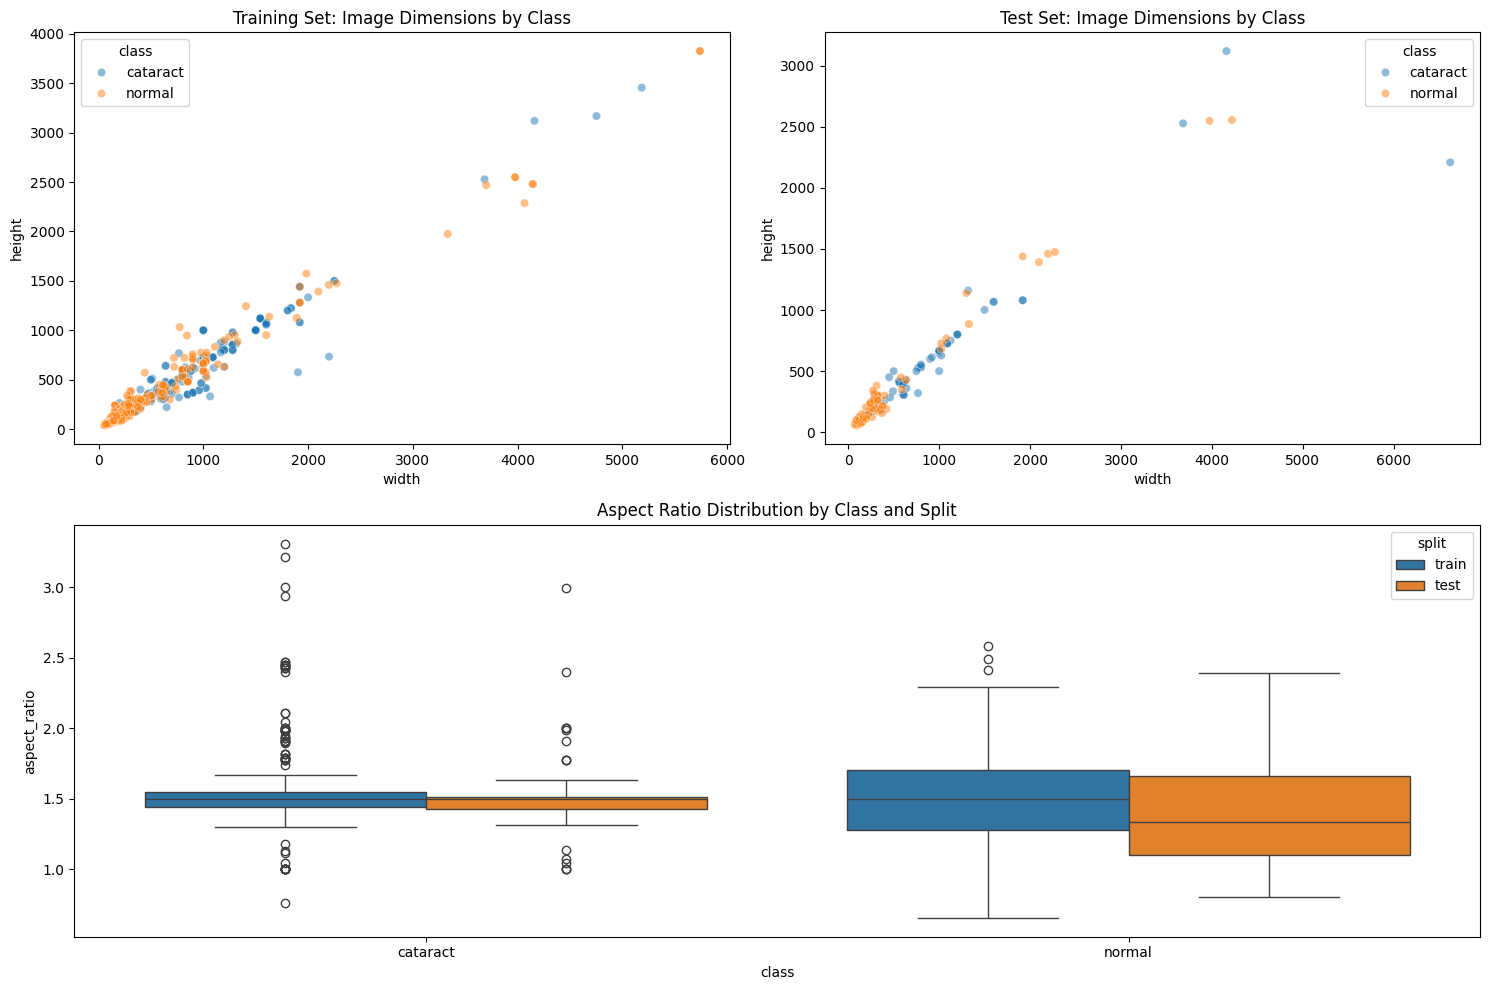

In [27]:
df = pd.DataFrame(image_properties)

# Cell 4: Image Dimensions Analysis
plt.figure(figsize=(15, 10))

# Training set dimensions
plt.subplot(2, 2, 1)
sns.scatterplot(data=df[df['split']=='train'], 
                x='width', y='height', 
                hue='class', alpha=0.5)
plt.title('Training Set: Image Dimensions by Class')

# Test set dimensions
plt.subplot(2, 2, 2)
sns.scatterplot(data=df[df['split']=='test'], 
                x='width', y='height', 
                hue='class', alpha=0.5)
plt.title('Test Set: Image Dimensions by Class')

# Aspect ratio by split and class
plt.subplot(2, 1, 2)
sns.boxplot(data=df, x='class', y='aspect_ratio', hue='split')
plt.title('Aspect Ratio Distribution by Class and Split')

plt.tight_layout()
plt.show()

In [28]:
# Print dimension statistics
print("\nDimension Statistics:")
print(df.groupby(['split', 'class'])[['height', 'width', 'aspect_ratio']].describe())



Dimension Statistics:
               height                                                        \
                count        mean         std    min     25%    50%     75%   
split class                                                                   
test  cataract   61.0  610.590164  536.864116  136.0  305.00  500.0  727.00   
      normal     60.0  415.366667  538.084171   55.0  139.25  216.5  343.25   
train cataract  245.0  606.118367  452.629338  115.0  313.00  480.0  800.00   
      normal    246.0  406.508130  558.368584   36.0  100.50  210.5  480.00   

                        width              ...                 aspect_ratio  \
                   max  count        mean  ...     75%     max        count   
split class                                ...                                
test  cataract  3120.0   61.0  963.065574  ...  1091.0  6622.0         61.0   
      normal    2556.0   60.0  591.766667  ...   405.5  4220.0         60.0   
train cataract  3456.0  245.

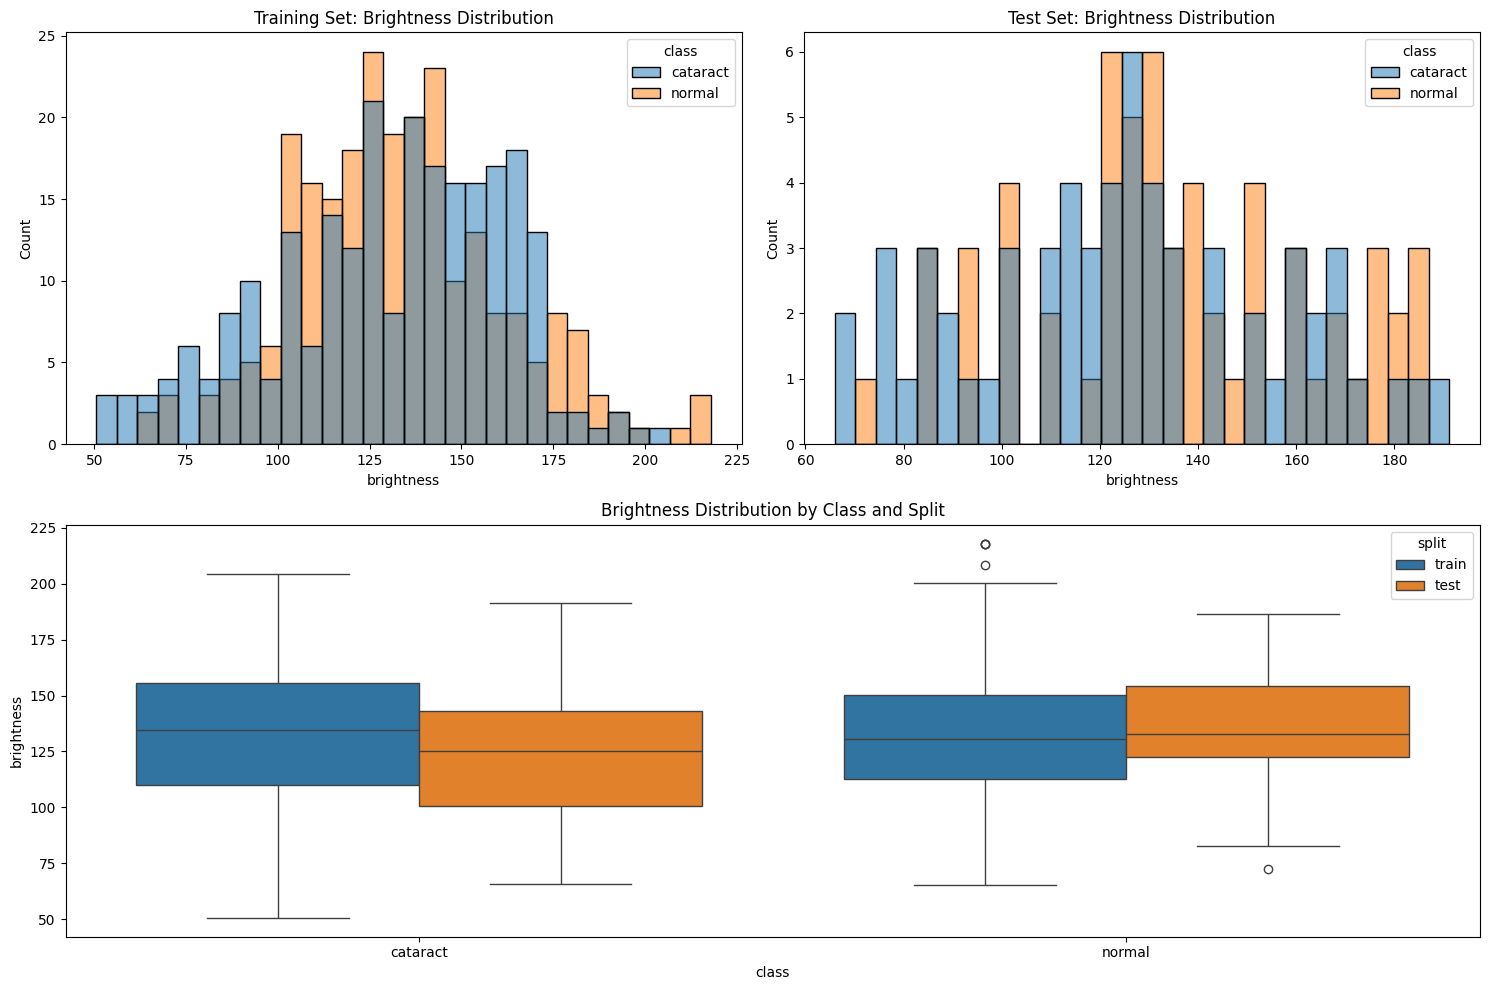

In [29]:
plt.figure(figsize=(15, 10))

# Training set brightness
plt.subplot(2, 2, 1)
sns.histplot(data=df[df['split']=='train'], 
             x='brightness', hue='class', 
             bins=30, alpha=0.5)
plt.title('Training Set: Brightness Distribution')

# Test set brightness
plt.subplot(2, 2, 2)
sns.histplot(data=df[df['split']=='test'], 
             x='brightness', hue='class', 
             bins=30, alpha=0.5)
plt.title('Test Set: Brightness Distribution')

# Boxplot of brightness
plt.subplot(2, 1, 2)
sns.boxplot(data=df, x='class', y='brightness', hue='split')
plt.title('Brightness Distribution by Class and Split')

plt.tight_layout()
plt.show()

In [30]:
print("\nBrightness Statistics:")
print(df.groupby(['split', 'class'])['brightness'].describe())



Brightness Statistics:
                count        mean        std        min         25%  \
split class                                                           
test  cataract   61.0  124.964269  31.210007  65.987108  100.538758   
      normal     60.0  135.049493  28.729204  72.579473  122.398817   
train cataract  245.0  130.163850  31.742465  50.565424  109.799931   
      normal    246.0  133.127700  28.505902  65.491130  112.831424   

                       50%         75%         max  
split class                                         
test  cataract  125.158790  143.206284  191.187976  
      normal    132.706398  154.113480  186.618676  
train cataract  134.758052  155.495651  204.177565  
      normal    130.725489  150.288189  217.947635  


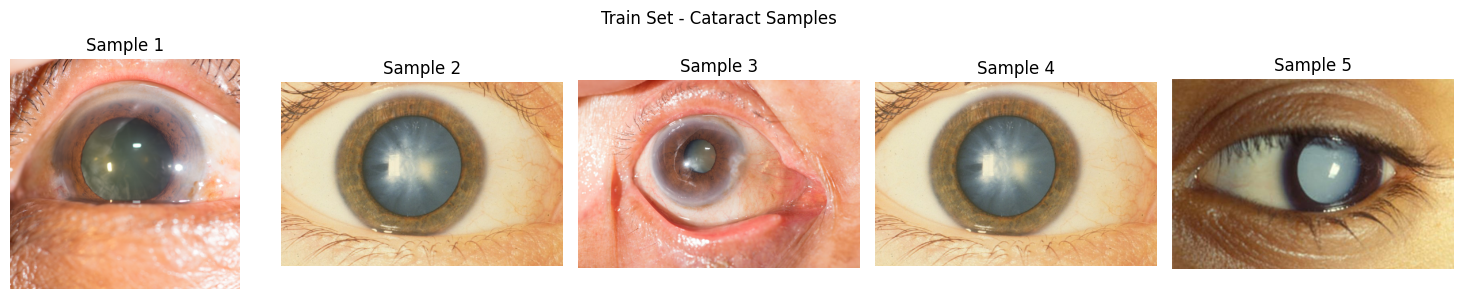

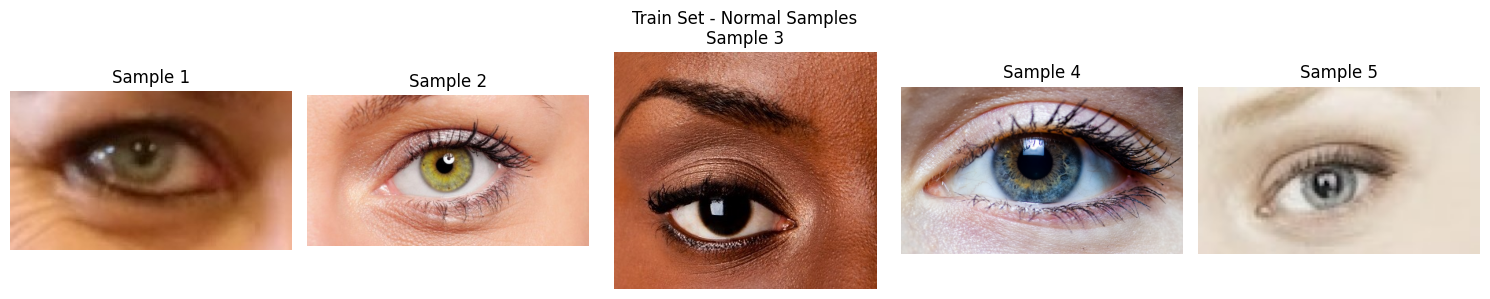

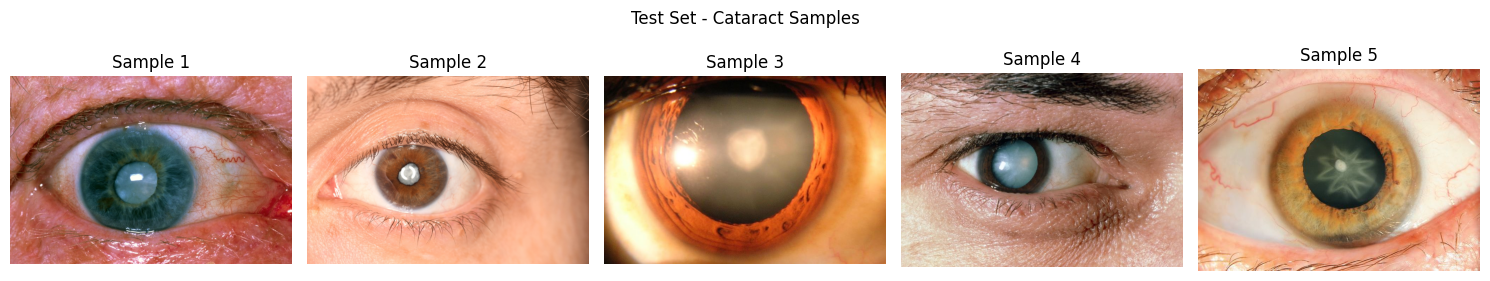

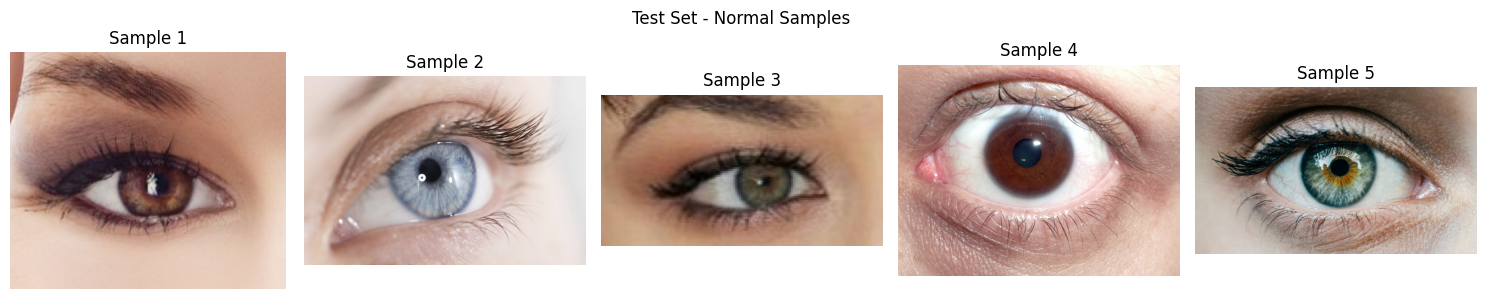

In [31]:
# Cell 6: Sample Images Display
def display_sample_images(split, category, num_samples=5):
    plt.figure(figsize=(15, 3))
    
    img_dir = os.path.join(base_dir, split, category)
    sample_files = np.random.choice(os.listdir(img_dir), num_samples)
    
    for i, img_file in enumerate(sample_files, 1):
        img_path = os.path.join(img_dir, img_file)
        img = cv2.imread(img_path)
        plt.subplot(1, num_samples, i)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f'Sample {i}')
    
    plt.suptitle(f'{split.capitalize()} Set - {category.capitalize()} Samples')
    plt.tight_layout()
    plt.show()

# Display samples from each category and split
display_sample_images('train', 'cataract')
display_sample_images('train', 'normal')
display_sample_images('test', 'cataract')
display_sample_images('test', 'normal')

In [32]:
def analyze_image_quality(img_path):
    img = cv2.imread(img_path)
    if img is not None:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
        contrast = gray.std()
        return laplacian_var, contrast
    return None, None

quality_data = []
for idx, row in tqdm(df.iterrows(), desc="Analyzing image quality"):
    img_path = os.path.join(base_dir, row['split'], row['class'], row['filename'])
    sharpness, contrast = analyze_image_quality(img_path)
    quality_data.append({
        'split': row['split'],
        'class': row['class'],
        'sharpness': sharpness,
        'contrast': contrast
    })

Analyzing image quality: 612it [00:12, 48.10it/s] 


In [33]:
quality_df = pd.DataFrame(quality_data)

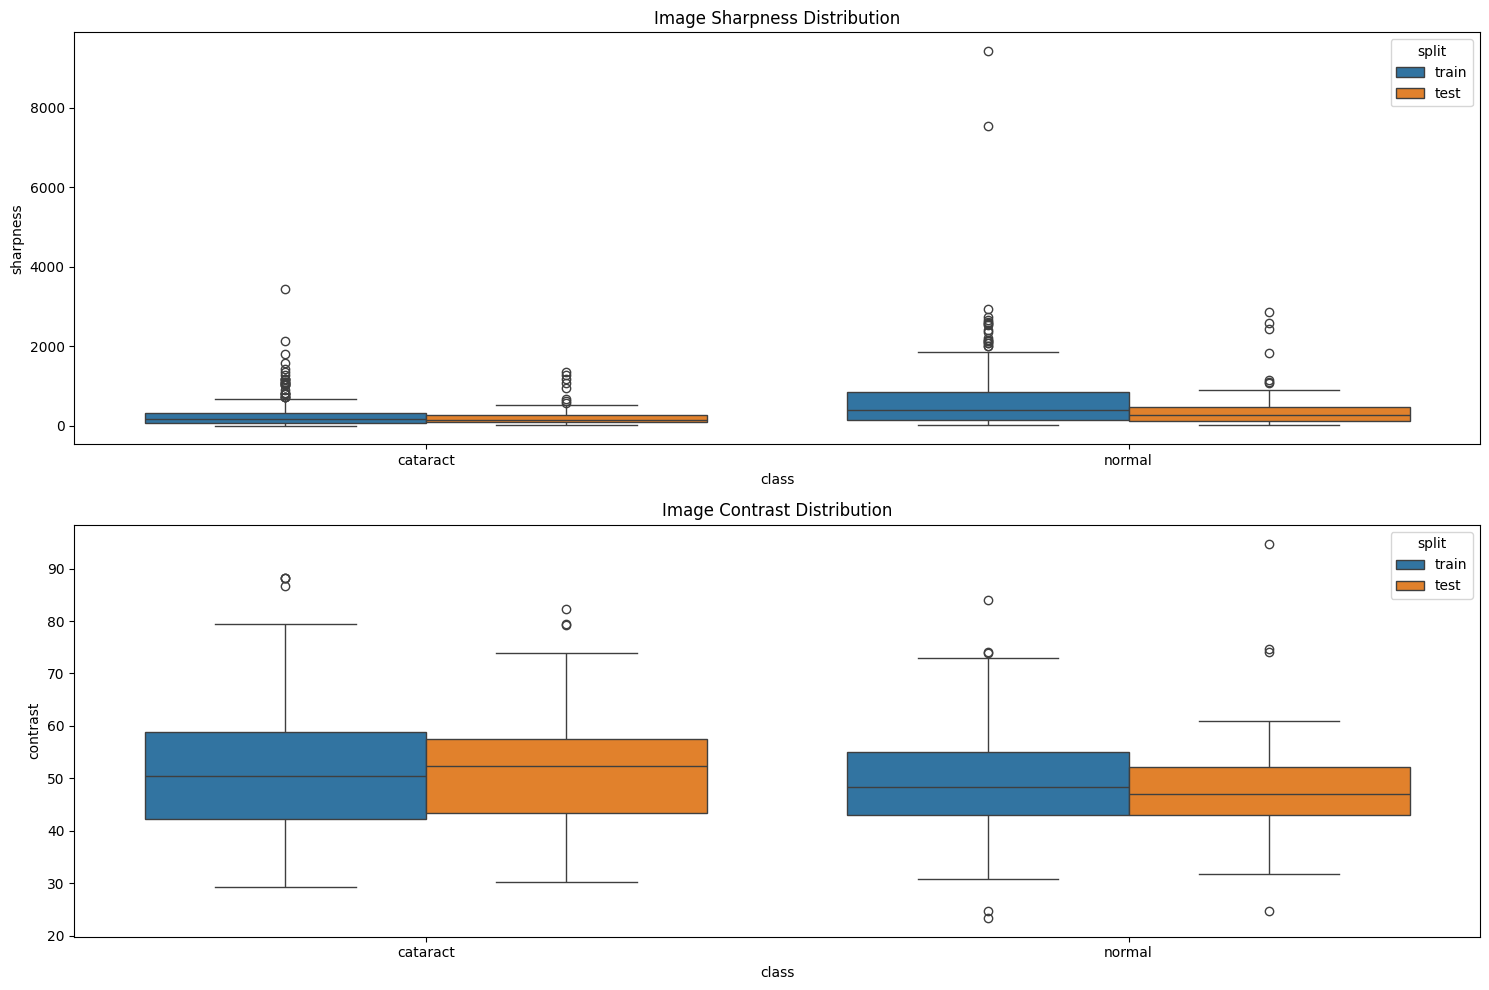

In [34]:
plt.figure(figsize=(15, 10))

# Sharpness distribution
plt.subplot(2, 1, 1)
sns.boxplot(data=quality_df, x='class', y='sharpness', hue='split')
plt.title('Image Sharpness Distribution')

# Contrast distribution
plt.subplot(2, 1, 2)
sns.boxplot(data=quality_df, x='class', y='contrast', hue='split')
plt.title('Image Contrast Distribution')

plt.tight_layout()
plt.show()

In [35]:
print("\nImage Quality Statistics by Split and Class:")
print("\nSharpness Statistics:")
print(quality_df.groupby(['split', 'class'])['sharpness'].describe())
print("\nContrast Statistics:")
print(quality_df.groupby(['split', 'class'])['contrast'].describe())



Image Quality Statistics by Split and Class:

Sharpness Statistics:
                count        mean         std        min         25%  \
split class                                                            
test  cataract   61.0  264.521977  314.746989  22.160885   81.600241   
      normal     60.0  449.713813  605.811244  14.645015  108.605387   
train cataract  245.0  292.838963  396.369029   4.224143   65.203871   
      normal    246.0  691.430977  957.861128  10.368071  153.934809   

                       50%         75%          max  
split class                                          
test  cataract  141.889888  268.621462  1355.652551  
      normal    277.478537  467.680728  2859.963095  
train cataract  168.515407  319.624252  3436.794916  
      normal    403.864583  850.442329  9431.286955  

Contrast Statistics:
                count       mean        std        min        25%        50%  \
split class                                                             

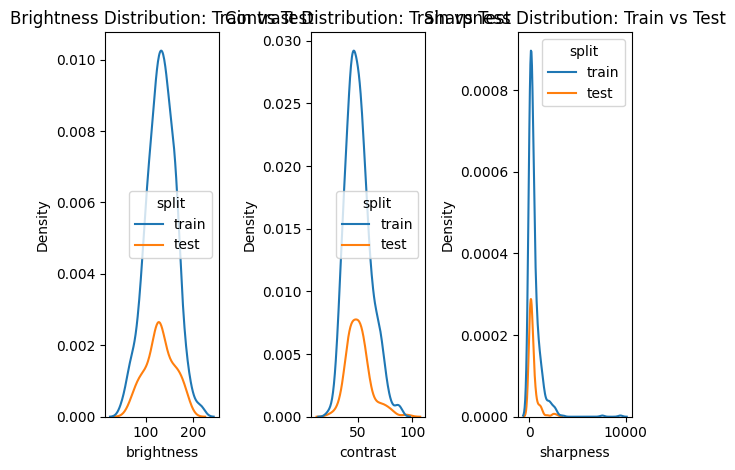

In [36]:
# Compare distributions of key metrics between train and test
metrics = ['brightness', 'contrast', 'sharpness']
for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    if metric in df.columns:
        data = df
    else:
        data = quality_df
    
    sns.kdeplot(data=data, x=metric, hue='split',)
    plt.title(f'{metric.capitalize()} Distribution: Train vs Test')

plt.tight_layout()
plt.show()

In [37]:
def print_split_analysis(split):
    split_data = df[df['split'] == split]
    print(f"\n{split.capitalize()} Set Analysis:")
    print(f"Total images: {len(split_data)}")
    print(f"Class distribution:")
    print(split_data['class'].value_counts())
    print(f"\nResolution range:")
    print(f"Width: {split_data['width'].min()} - {split_data['width'].max()}")
    print(f"Height: {split_data['height'].min()} - {split_data['height'].max()}")

print("Dataset Analysis Summary:")
print("-" * 50)
print_split_analysis('train')
print_split_analysis('test')

Dataset Analysis Summary:
--------------------------------------------------

Train Set Analysis:
Total images: 491
Class distribution:
class
normal      246
cataract    245
Name: count, dtype: int64

Resolution range:
Width: 54 - 5739
Height: 36 - 3826

Test Set Analysis:
Total images: 121
Class distribution:
class
cataract    61
normal      60
Name: count, dtype: int64

Resolution range:
Width: 69 - 6622
Height: 55 - 3120


In [38]:
def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

for metric in ['brightness', 'contrast', 'sharpness']:
    if metric in df.columns:
        train_dist = df[df['split'] == 'train'][metric]
        test_dist = df[df['split'] == 'test'][metric]
    else:
        train_dist = quality_df[quality_df['split'] == 'train'][metric]
        test_dist = quality_df[quality_df['split'] == 'test'][metric]
    
    # Normalize distributions
    train_hist = np.histogram(train_dist, bins=50, density=True)[0]
    test_hist = np.histogram(test_dist, bins=50, density=True)[0]
    
    # Add small constant to avoid division by zero
    train_hist = train_hist + 1e-10
    test_hist = test_hist + 1e-10
    
    # Normalize
    train_hist = train_hist / train_hist.sum()
    test_hist = test_hist / test_hist.sum()
    
    kl_div = kl_divergence(train_hist, test_hist)
    print(f"\nKL divergence for {metric}: {kl_div:.4f}")



KL divergence for brightness: 2.9266

KL divergence for contrast: 2.8036

KL divergence for sharpness: 0.3951


In [39]:
print("\nRecommendations:")
# Class balance
train_ratio = len(train_cataract) / len(train_normal)
test_ratio = len(test_cataract) / len(test_normal)
if abs(train_ratio - test_ratio) > 0.1:
    print("1. Consider rebalancing classes between train and test sets")

# Resolution consistency
if df['width'].std() > df['width'].mean() * 0.1 or df['height'].std() > df['height'].mean() * 0.1:
    print("2. Consider standardizing image dimensions")

# Quality checks
if quality_df['sharpness'].std() > quality_df['sharpness'].mean() * 0.5:
    print("3. Consider preprocessing to normalize image quality:")
    print("   - Image enhancement")
    print("   - Sharpness normalization")
    print("   - Contrast adjustment")

# Distribution similarity
if abs(train_ratio - test_ratio) > 0.1:
    print("4. Warning: Train and test sets have different class distributions")


Recommendations:
2. Consider standardizing image dimensions
3. Consider preprocessing to normalize image quality:
   - Image enhancement
   - Sharpness normalization
   - Contrast adjustment
